In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from config import API_KEY



In [2]:
# Function to fetch data from Nasdaq API
def fetch_stock_data(symbol, api_key):
    url = f"https://data.nasdaq.com/api/v3/datasets/WIKI/{symbol}.json"
    params = {
        'api_key': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data['dataset']['data'], columns=data['dataset']['column_names'])

# Fetch data for AT&T, T-Mobile, and Verizon
symbols = {
    'Exxon Mobile': 'XOM',
    'Chevron': 'CVX',
    'ConocoPhillips': 'COP'
}

oil_stock_data = {}
for company, symbol in symbols.items():
    oil_stock_data[company] = fetch_stock_data(symbol, API_KEY)

# Combine the data into a single DataFrame for analysis
combined_oil_data = pd.concat(oil_stock_data.values(), keys=oil_stock_data.keys())
combined_oil_data.reset_index(level=0, inplace=True)
combined_oil_data.rename(columns={'level_0': 'Company'}, inplace=True)

# Save the combined data to a CSV file for further analysis
combined_oil_data.to_csv('outputs/combined_oil_data.csv', index=False)

# Display the combined data to verify
combined_oil_data.head()

,Company,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,Exxon Mobile,2018-03-27,74.00,74.8949,73.2750,73.70,14625541.0,0.0,1.0,74.00,74.8949,73.2750,73.70,14625541.0
1,Exxon Mobile,2018-03-26,73.65,74.1500,72.7548,74.00,14894438.0,0.0,1.0,73.65,74.1500,72.7548,74.00,14894438.0
2,Exxon Mobile,2018-03-23,73.81,74.2100,72.6700,72.89,19069634.0,0.0,1.0,73.81,74.2100,72.6700,72.89,19069634.0
3,Exxon Mobile,2018-03-22,74.42,74.7000,73.3900,73.50,17118037.0,0.0,1.0,74.42,74.7000,73.3900,73.50,17118037.0
4,Exxon Mobile,2018-03-21,74.23,75.6400,73.9800,75.04,14813757.0,0.0,1.0,74.23,75.6400,73.9800,75.04,14813757.0


In [3]:
# Convert the Date column to datetime format
combined_oil_data['Date'] = pd.to_datetime(combined_oil_data['Date'])

# Sort the data by Company and Date
combined_oil_data.sort_values(by=['Company', 'Date'], inplace=True)

# Handle missing values (if any)
combined_oil_data.fillna(method='ffill', inplace=True)
combined_oil_data.fillna(method='bfill', inplace=True)

# Verify the cleaned data
combined_oil_data.head()

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_69989/2805449925.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_oil_data.fillna(method='ffill', inplace=True)
/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_69989/2805449925.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_oil_data.fillna(method='bfill', inplace=True)


,Company,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
12167,Chevron,1970-01-02,51.12,52.25,51.12,52.25,131600.0,0.0,1.0,4.193750,4.286453,4.193750,4.286453,526400.0
12166,Chevron,1970-01-05,52.25,52.88,52.12,52.50,280400.0,0.0,1.0,4.286453,4.338136,4.275788,4.306962,1121600.0
12165,Chevron,1970-01-06,52.50,52.75,51.50,51.75,138400.0,0.0,1.0,4.306962,4.327471,4.224925,4.245434,553600.0
12164,Chevron,1970-01-07,51.75,51.88,51.12,51.62,112800.0,0.0,1.0,4.245434,4.256099,4.193750,4.234769,451200.0
12163,Chevron,1970-01-08,52.25,53.00,52.25,52.62,158800.0,0.0,1.0,4.286453,4.347981,4.286453,4.316806,635200.0


In [4]:
# Filter the data to include only dates from 2015-01-01 to 2017-12-12
start_date = pd.Timestamp('2017-01-01')
end_date = pd.Timestamp('2017-12-12')
filtered_data = combined_oil_data[(combined_oil_data['Date'] >= start_date) & (combined_oil_data['Date'] <= end_date)]

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_69989/3126268163.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_data = filtered_data.groupby('Company').resample('Q').mean().reset_index()


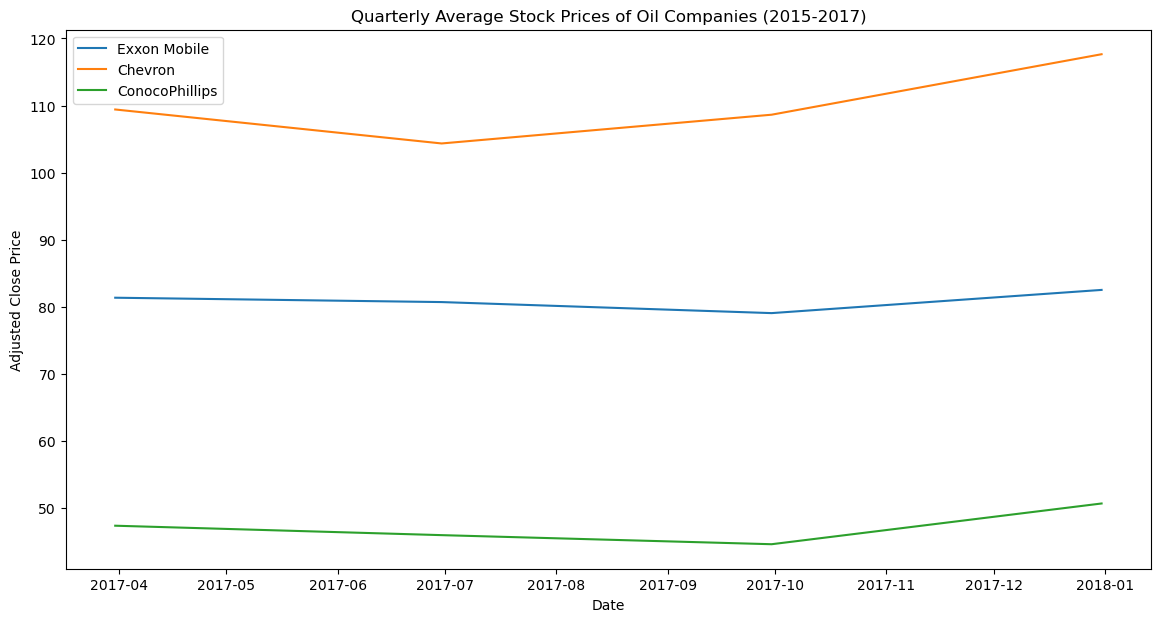

In [5]:
# create a line graph of stock prices by quarter for each stock
# Resample the data to get quarterly averages
filtered_data.set_index('Date', inplace=True)
quarterly_data = filtered_data.groupby('Company').resample('Q').mean().reset_index()

# Plotting the stock prices by quarter for each stock
plt.figure(figsize=(14, 7))
for company in symbols.keys():
    company_data = quarterly_data[quarterly_data['Company'] == company]
    plt.plot(company_data['Date'], company_data['Adj. Close'], label=company)

plt.title('Quarterly Average Stock Prices of Oil Companies 2017')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_69989/3966203088.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_volume_data = filtered_data.groupby('Company').resample('Q')['Volume'].sum().reset_index()


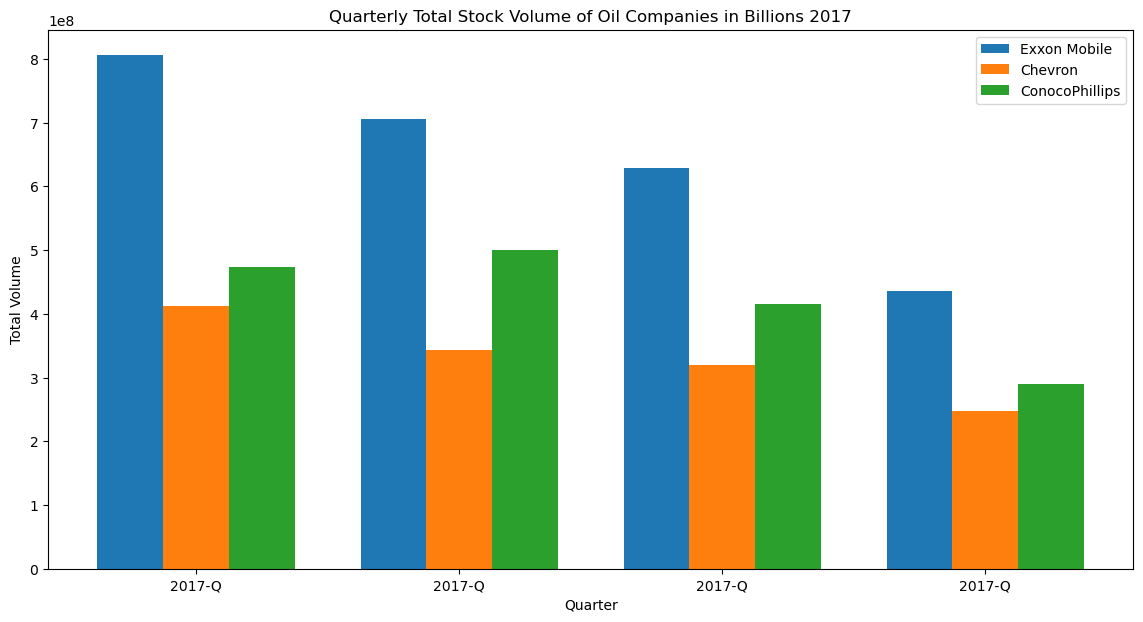

In [8]:
# Calculate total stock volume for each quarter
quarterly_volume_data = filtered_data.groupby('Company').resample('Q')['Volume'].sum().reset_index()

# Plotting the total stock volume for each quarter as a bar graph
fig, ax = plt.subplots(figsize=(14, 7))

# Setting the width of the bars
bar_width = 0.25

# Setting the positions of the bars
positions = [i for i in range(len(quarterly_volume_data['Date'].unique()))]
offsets = {
    'Exxon Mobile': -bar_width,
    'Chevron': 0,
    'ConocoPhillips': bar_width
}

for company in symbols.keys():
    company_volume_data = quarterly_volume_data[quarterly_volume_data['Company'] == company]
    ax.bar([p + offsets[company] for p in positions],
           company_volume_data['Volume'],
           width=bar_width,
           label=company)

# Adding titles and labels
ax.set_title('Quarterly Total Stock Volume of Oil Companies in Billions 2017')
ax.set_xlabel('Quarter')
ax.set_ylabel('Total Volume')

# Setting the position of the x ticks
ax.set_xticks(positions)
ax.set_xticklabels(quarterly_volume_data['Date'].unique().strftime('%Y-%Q'))

# Adding the legend
ax.legend()

plt.show()

/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_69989/1618872780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Daily Return'] = filtered_data.groupby('Company')['Adj. Close'].pct_change()
/var/folders/rb/2tm7zw5j145975vwqn87sn100000gn/T/ipykernel_69989/1618872780.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_std_data = filtered_data.groupby('Company').resample('Q')['Daily Return'].std().reset_index()


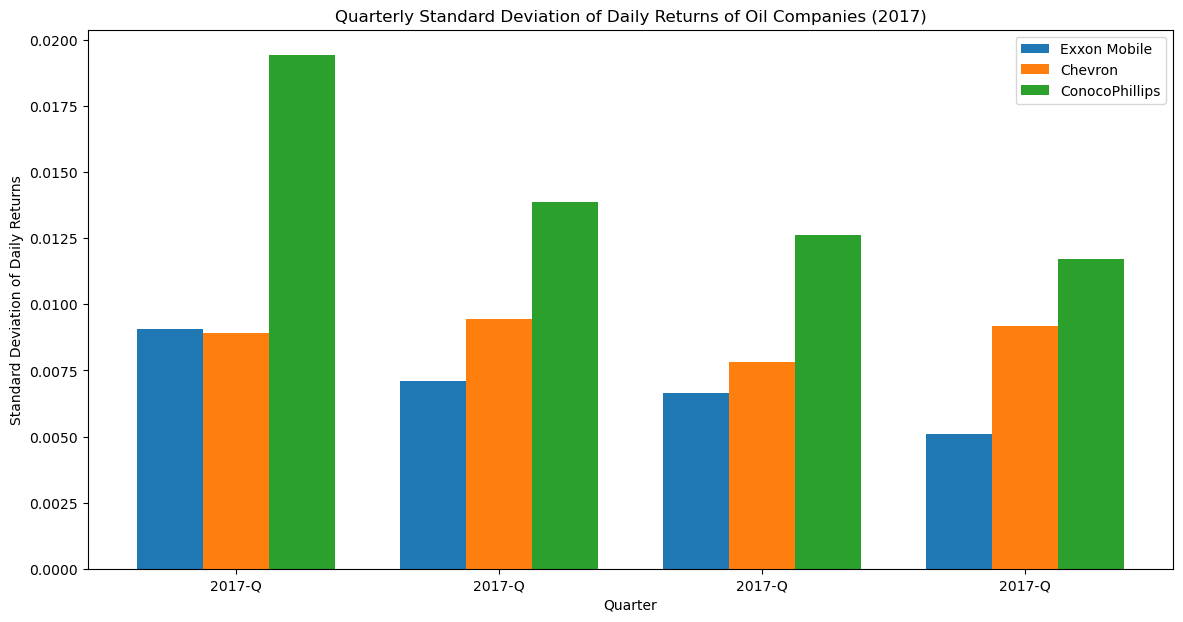

In [12]:
# Calculate daily returns
filtered_data['Daily Return'] = filtered_data.groupby('Company')['Adj. Close'].pct_change()

# Resample the data to get standard deviation of daily returns per quarter
# filtered_data.set_index('Date', inplace=True)
quarterly_std_data = filtered_data.groupby('Company').resample('Q')['Daily Return'].std().reset_index()

# Plotting the standard deviation of daily returns per quarter as a bar graph
fig, ax = plt.subplots(figsize=(14, 7))

# Setting the width of the bars
bar_width = 0.25

# Setting the positions of the bars
positions = [i for i in range(len(quarterly_std_data['Date'].unique()))]
offsets = {
    'Exxon Mobile': -bar_width,
    'Chevron': 0,
    'ConocoPhillips': bar_width
}

for company in symbols.keys():
    company_std_data = quarterly_std_data[quarterly_std_data['Company'] == company]
    ax.bar([p + offsets[company] for p in positions],
           company_std_data['Daily Return'],
           width=bar_width,
           label=company)

# Adding titles and labels
ax.set_title('Quarterly Standard Deviation of Daily Returns of Oil Companies (2017)')
ax.set_xlabel('Quarter')
ax.set_ylabel('Standard Deviation of Daily Returns')

# Setting the position of the x ticks
ax.set_xticks(positions)
ax.set_xticklabels(quarterly_std_data['Date'].unique().strftime('%Y-%Q'))

# Adding the legend
ax.legend()

plt.show()

In [ ]:
# rough mock up of oil data